# Training and evaluating Singing Voice Detectors

In [1]:
import sys
sys.path.append('../vocaldetection/')
import sklearn
import utils
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns

I know that the best parameters for training SVM and RF on this dataset are C=0.1 for SVM and nE=100 for RF.

Then, I can just train the models with these parameters and see how the results on confusion changes.

For each set of descriptors, I can do a cross validation evaluation and see the accuracy for each classifier.

Then, I select the greater accuracy to be my reference of ceiling confusion.

In [2]:
features = ['VGGish']

In [3]:
labels = ['absent','present']

In [4]:
# Read features and labels
VGGish_PATH = '/media/shayenne/CompMusHD/BRUCUTU/fasttmp/VGGISH/'
FEAT_PATH = os.environ["FEAT_PATH"]
PIECES = os.environ["PIECES_JSON"]

In [5]:
music_files = []

with open(PIECES) as json_file:  
    data = json.load(json_file)

    for music in data.keys():
        music_files.append(FEAT_PATH+music)

In [8]:
train_features = []
train_labels = []

for tf in music_files:
    # Load VGGish audio embeddings
    try:
        vggish = pd.read_csv(VGGish_PATH+os.path.basename(tf)+"_VGGish_PCA.csv",index_col=None, header=None)
        vggish = vggish.values
    
        print(vggish.shape)
    except FileNotFoundError:
        print ('Não encontrei', os.path.basename(tf))
        continue
    # Load MFCCs features
#     mfccs = pd.read_csv(tf+"_mfcc.csv",index_col=None, header=None)
#     mfccs = mfccs.values.T
    #mfcc = np.load(tf+"_mfcc.npy")
    #print (mfcc.shape)
    
    # Load VocalVariance features
#     vv = pd.read_csv(tf+"_vocalvar.csv",index_col=None, header=None)
#     vv = vv.values.T
    #vv = np.load(tf+"_vocalvar.npy")
    #print (vv.shape)
    
    #fl = np.load(tf+"_fluctogram.npy")
    #print (fl.shape)

    # Read labels for each frame
#    labels = pd.read_csv(tf+"_lbl.csv",index_col=None, header=None)
#    labels = labels.values[0]
    lbl = np.load(tf+"_labels.npy")
    print (lbl.shape)
    
    feature_vector = []
    for idx in range(vggish.shape[0]):
        #feature_vector.append(np.concatenate((mfcc[idx], vv[idx], fl[idx]), axis=0))
        feature_vector.append(vggish[idx])
        
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(lbl[idx])
    

(356, 128)
(357,)
Não encontrei AimeeNorwich_Child
Não encontrei AlexanderRoss_GoodbyeBolero
Não encontrei AlexanderRoss_VelvetCurtain
(432, 128)
(433,)
(539, 128)
(540,)
(305, 128)
(306,)
(356, 128)
(357,)
Não encontrei BrandonWebster_YesSirICanFly
Não encontrei CelestialShore_DieForUs
Não encontrei ClaraBerryAndWooldog_AirTraffic
(318, 128)
(319,)
Não encontrei ClaraBerryAndWooldog_Stella
(529, 128)
(530,)
Não encontrei ClaraBerryAndWooldog_WaltzForMyVictims
Não encontrei Creepoid_OldTree
Não encontrei Debussy_LenfantProdigue
Não encontrei DreamersOfTheGhetto_HeavyLove
Não encontrei FacesOnFilm_WaitingForGa
(418, 128)
(419,)
Não encontrei Grants_PunchDrunk
(463, 128)
(464,)
Não encontrei HeladoNegro_MitadDelMundo
Não encontrei HezekiahJones_BorrowedHeart
Não encontrei HopAlong_SisterCities
Não encontrei InvisibleFamiliars_DisturbingWildlife
(353, 128)
(354,)
(373, 128)
(374,)
Não encontrei LizNelson_Rainfall
(1308, 128)
(1309,)
(236, 128)
(237,)
Não encontrei MatthewEntwistle_Lontano

In [9]:
X = np.array(train_features)
y = np.array(train_labels)

In [10]:
print (sum(y)/len(X))

0.7121553667418068


In [11]:
# Split dataset into train, validation and test sets

In [12]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [14]:
from sklearn.model_selection import KFold # import KFold
seed = 7
kf = KFold(n_splits=2, random_state=seed) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [15]:
# Shuffle dataframe to avoid use frames of same music on test 
### df.sample(frac=1).reset_index(drop=True)

In [16]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 5767  5768  5769 ... 11531 11532 11533] TEST: [   0    1    2 ... 5764 5765 5766]
TRAIN: [   0    1    2 ... 5764 5765 5766] TEST: [ 5767  5768  5769 ... 11531 11532 11533]


In [17]:
# Fit models

# Evaluate models

In [18]:
def plot_cm(cm):
    fig, ax = plt.subplots()
    ax.imshow(cm, interpolation='nearest', cmap='gray')
    for i, line in enumerate(cm):
        for j, l in enumerate(line):
            ax.text(j, i, l, size=20, color='green')
    ax.set_xticks(range(len(cm)))
    ax.set_xticklabels(labels)
    ax.set_yticks(range(len(cm)))
    ax.set_yticklabels(labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    plt.show()

In [19]:
X.shape

(11534, 128)

# SVM with scaler

In [20]:
# save the scaler to disk
#filename = 'scaler_features.sav'
#joblib.dump(scaler, filename)

In [37]:
# Use scikit-learn to train a model with the training features we've extracted
from sklearn.svm import SVC
import pandas as pd
import joblib

results_svm = pd.DataFrame(columns=['classifier','parameter','accuracy', 'cm', 'features'])

classifier = 'SVM'
features = 'VGGish'

n_split = 0

for train_index, test_index in kf.split(X):    
    n_split += 1
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a scale object
    scaler = sklearn.preprocessing.StandardScaler()

    # Learn the parameters from the training data only
    scaler.fit(X_train)

    # Apply the learned parameters to the training and test sets:
    train_features_scaled = scaler.fit_transform(X_train)

    test_features_scaled = scaler.transform(X_test)
    
    # Lets use a SVC with folowing C parameters: 
    params = [0.1] #[1, 0.1, 0.01, 0.001]

    for c in params:
        clf = SVC(C=c, probability=True)

        # Fit (=train) the model
        clf.fit(train_features_scaled, y_train)

        filename = 'finalized_model_'+classifier+'_'+str(c)+'_'+features+'_'+str(n_split)+'.sav'
        print (filename)
        joblib.dump(clf, filename)

        # Now lets predict the labels of the test data!
        predictions = clf.predict(test_features_scaled)
        # SVM Accuracy
        accuracy = sklearn.metrics.accuracy_score(y_test, predictions)

        # lets compute the show the confusion matrix:
        cm = sklearn.metrics.confusion_matrix(y_test, predictions)
        
        results_svm.loc[results_svm.index.max() + 1] = [classifier, c, accuracy, cm, features]


TRAIN: [ 5767  5768  5769 ... 11531 11532 11533] TEST: [   0    1    2 ... 5764 5765 5766]


/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


finalized_model_SVM_0.1_VGGish_1.sav
TRAIN: [   0    1    2 ... 5764 5765 5766] TEST: [ 5767  5768  5769 ... 11531 11532 11533]


/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


finalized_model_SVM_0.1_VGGish_2.sav


In [35]:
results_svm.to_pickle('results_svm.pkl')

/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8423790532339172
[[1106  447]
 [ 462 3752]]


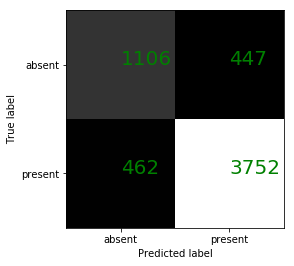

/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8448066585746489
[[1173  380]
 [ 515 3699]]


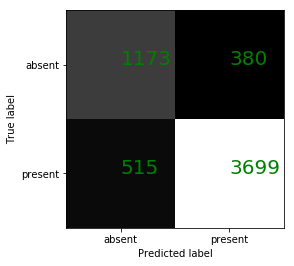

/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8520894745968441
[[1192  361]
 [ 492 3722]]


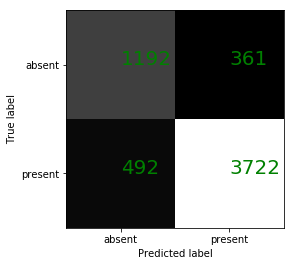

/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7497832495231489
[[ 123 1430]
 [  13 4201]]


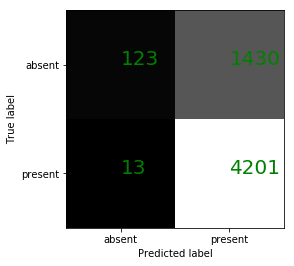

/home/shayenne/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7307092075602566
[[   0 1553]
 [   0 4214]]


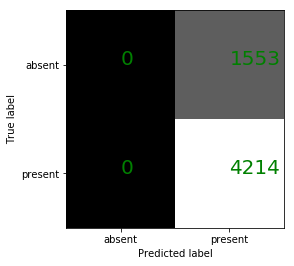

In [22]:
# Use scikit-learn to train a model with the training features we've extracted
from sklearn.svm import SVC
# Lets use a SVC with folowing C parameters: 
params = [10, 1, 0.1, 0.01, 0.001]

for c in params:
    clf1 = SVC(C=c)

    # Fit (=train) the model
    clf1.fit(train_features_scaled, y_train)
    
    # save the model to disk
    #filename = 'finalized_model_SVM_'+str(c)+'_VGGish.sav'
    #print (filename)
    #joblib.dump(clf, filename)
    
    # Now lets predict the labels of the test data!
    predictions = clf1.predict(test_features_scaled)
    # SVM Accuracy
    accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print(accuracy)
    
    # lets compute the show the confusion matrix:
    cm = sklearn.metrics.confusion_matrix(y_test, predictions)
    print(cm)
    
    plot_cm(cm)

In [38]:
# Now lets predict the labels of the test data!
predictions = clf.predict(test_features_scaled)

In [39]:
# Biased Guess Accuracy
ones = np.ones(len(predictions))
accuracy = sklearn.metrics.accuracy_score(y_test, ones)
print(accuracy)

0.7307092075602566


In [40]:
# SVM Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.8520894745968441


In [41]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1192  361]
 [ 492 3722]]


# Testing on one piece

In [74]:
piece_name = 'BigTroubles_Phantom'

In [75]:
vggish = pd.read_csv(VGGish_PATH+piece_name+"_VGGish_PCA.csv",index_col=None, header=None)
vggish = vggish.values

In [76]:
piece_features_scaled = scaler.transform(vggish)

In [77]:
pred_labels = clf.predict(piece_features_scaled)

In [78]:
piece_test = np.load(FEAT_PATH+piece_name+"_labels.npy")
print (piece_test.shape, vggish.shape)
piece_test = piece_test[:vggish.shape[0]]

(306,) (305, 128)


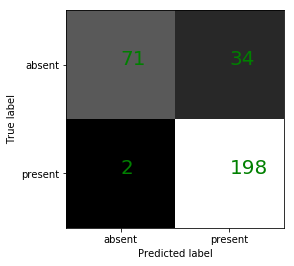

In [79]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(piece_test, pred_labels)
plot_cm(cm)

In [80]:
proba = clf.predict_proba(piece_features_scaled)
proba = proba[:,1]

In [81]:
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

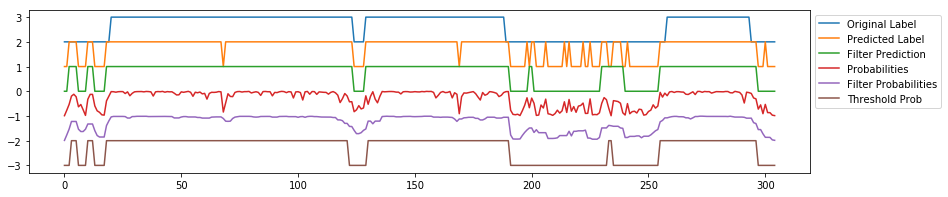

In [84]:
plt.figure(figsize=(14,3))
plt.plot(piece_test+2)
plt.plot(pred_labels+1)
plt.plot(scipy.signal.medfilt(pred_labels,kernel_size=5))
plt.plot(proba-1)
plt.plot(scipy.signal.medfilt(proba,kernel_size=5)-2)
thresh = np.zeros(len(proba))
thresh[scipy.signal.medfilt(proba,kernel_size=5) > 0.6] = 1
plt.plot(thresh-3)
plt.legend(['Original Label', 'Predicted Label', 'Filter Prediction', 
            'Probabilities', 'Filter Probabilities', 'Threshold Prob'], bbox_to_anchor=(1, 1))

### Random Forest Classifier without scaler

In [33]:
# Use scikit-learn to train a model with the training features we've extracted
from sklearn.ensemble import RandomForestClassifier

results_rf = pd.DataFrame(columns=['classifier','parameter','accuracy', 'cm', 'features'])

classifier = 'RF'
features = 'MFCC, VV, FL'

for train_index, test_index in kf.split(X):


    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    params = [10, 20, 50, 100]

    for estimators in params:
        clf3 = RandomForestClassifier(n_estimators=estimators)

        # Fit (=train) the model
        clf3.fit(X_train, y_train)

        # save the model to disk
        #filename = 'finalized_model_RF_'+str(estimators)+'_'+features+'_'+str(n_split)+'.sav'
        #print (filename)
        #joblib.dump(clf3, filename)

        # Now lets predict the labels of the test data!
        predictions = clf3.predict(X_test)
        # We can use sklearn to compute the accuracy score
        accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
        print(accuracy)

        # lets compute the show the confusion matrix:
        cm = sklearn.metrics.confusion_matrix(y_test, predictions)
        print(cm)
        
        results_rf.loc[results_rf.index.max() + 1] = [classifier, estimators, accuracy, cm, features]

TRAIN: [ 2704  2705  2706 ... 27036 27037 27038] TEST: [   0    1    2 ... 2701 2702 2703]
0.7418639053254438
[[ 533  585]
 [ 113 1473]]
0.7392751479289941
[[ 502  616]
 [  89 1497]]
0.738905325443787
[[ 463  655]
 [  51 1535]]
0.7411242603550295
[[ 462  656]
 [  44 1542]]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [2704 2705 2706 ... 5405 5406 5407]
0.7540680473372781
[[ 468  530]
 [ 135 1571]]
0.728180473372781
[[ 410  588]
 [ 147 1559]]
0.7403846153846154
[[ 413  585]
 [ 117 1589]]
0.7422337278106509
[[ 416  582]
 [ 115 1591]]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [5408 5409 5410 ... 8109 8110 8111]
0.7851331360946746
[[ 743  130]
 [ 451 1380]]
0.7928994082840237
[[ 699  174]
 [ 386 1445]]
0.8125
[[ 709  164]
 [ 343 1488]]
0.8080621301775148
[[ 729  144]
 [ 375 1456]]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [ 8112  8113  8114 ... 10813 10814 10815]
0.7877218934911243
[[ 279  381]
 [ 193 1851]]
0.8047337278106509
[[ 299  361]
 [ 167 1877]]


In [34]:
results_rf

,classifier,parameter,accuracy,cm,features
NaN,RF,100,0.81687,"[[377, 291], [204, 1831]]","MFCC, VV, FL"


In [23]:
results_rf.to_pickle('results_random_forest_m-v-f.pkl')

In [24]:
results_rf = pd.read_pickle('results_random_forest.pkl')
results_rf_3 = pd.read_pickle('results_random_forest_m-v-f.pkl')

In [32]:
results_rf

,classifier,parameter,accuracy,cm,features
0,RF,10,0.744083,"[[545, 573], [119, 1467]]",MFCC
1,RF,20,0.745192,"[[503, 615], [74, 1512]]",MFCC
2,RF,50,0.735207,"[[465, 653], [63, 1523]]",MFCC
3,RF,100,0.744453,"[[467, 651], [40, 1546]]",MFCC
4,RF,10,0.765533,"[[508, 490], [144, 1562]]",MFCC
5,RF,20,0.728920,"[[423, 575], [158, 1548]]",MFCC
6,RF,50,0.735577,"[[414, 584], [131, 1575]]",MFCC
7,RF,100,0.732618,"[[398, 600], [123, 1583]]",MFCC
8,RF,10,0.786243,"[[707, 166], [412, 1419]]",MFCC
9,RF,20,0.796598,"[[729, 144], [406, 1425]]",MFCC


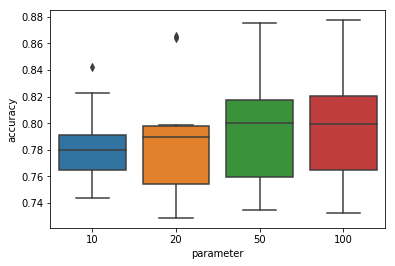

[(0.6, 1.0)]

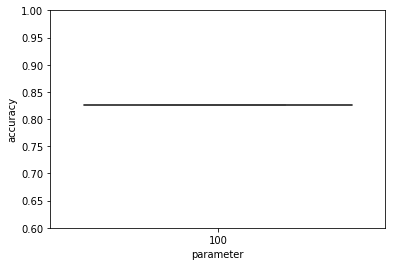

In [30]:
import seaborn as sns 
ax = sns.boxplot(x="parameter", y="accuracy", data=results_rf)
plt.show()
ax = sns.boxplot(x="parameter", y="accuracy", data=results_rf_3)
ax.set(ylim=(.60, 1.00))

0.7920828708842027
[[ 419  249]
 [ 313 1722]]


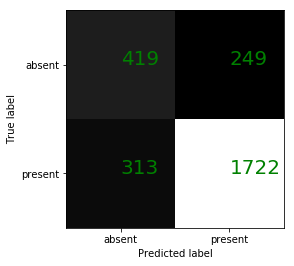

0.8079911209766926
[[ 416  252]
 [ 267 1768]]


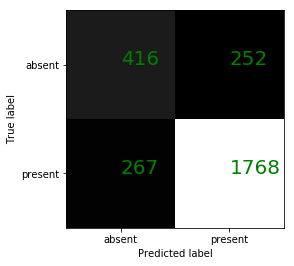

0.8161302256751757
[[ 395  273]
 [ 224 1811]]


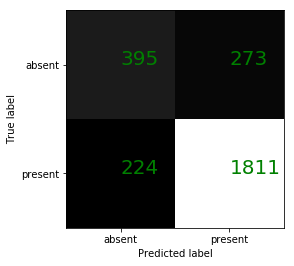

0.8205697373288938
[[ 394  274]
 [ 211 1824]]


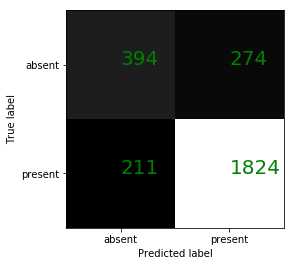

In [17]:
from sklearn.ensemble import RandomForestClassifier

params = [10, 20, 50, 100]

for estimators in params:
    clf3 = RandomForestClassifier(n_estimators=estimators)

    # Fit (=train) the model
    clf3.fit(X_train, y_train)
    
    # save the model to disk
    #filename = 'finalized_model_RF_'+str(estimators)+'_VGGish.sav'
    #print (filename)
    #joblib.dump(clf3, filename)
    
    # Now lets predict the labels of the test data!
    predictions = clf3.predict(X_test)
    # We can use sklearn to compute the accuracy score
    accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print(accuracy)
    
    # lets compute the show the confusion matrix:
    cm = sklearn.metrics.confusion_matrix(y_test, predictions)
    print(cm)
    
    plot_cm(cm)

In [18]:
# Now lets predict the labels of the test data!
predictions = clf3.predict(X_test)

In [19]:
# We can use sklearn to compute the accuracy score
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.8205697373288938


In [20]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 394  274]
 [ 211 1824]]


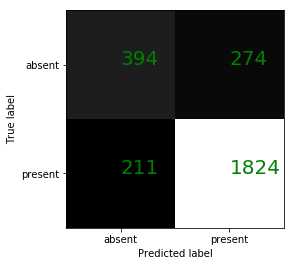

In [21]:
fig, ax = plt.subplots()
ax.imshow(cm, interpolation='nearest', cmap='gray')
for i, line in enumerate(cm):
    for j, l in enumerate(line):
        ax.text(j, i, l, size=20, color='green')
ax.set_xticks(range(len(cm)))
ax.set_xticklabels(labels)
ax.set_yticks(range(len(cm)))
ax.set_yticklabels(labels)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()

In [22]:
# Evaluate with Precision, Recall and F-score

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, predictions)


Text(0.5, 1.0, 'Singing Precision-Recall curve: AP=0.86')

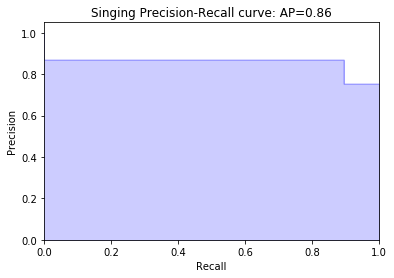

In [31]:
from inspect import signature
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Singing Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
